In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def display(img, dpi=300, axis=False):
    plt.figure(dpi=dpi)
    plt.imshow(img, cmap='gray')
    plt.axis(axis)
    plt.show()

In [3]:
cells = {}

In [11]:
for n in list(range(1, 7)):
    for d in ['t', 'b']:
        for c in ['l', 'r']:
            name = f"{n}{d}{c}"
            if name not in cells.keys():
                cells[name] = cv2.imread(f"images/{name}.jpg")
                print(name)            
                display(cells[name], 100)           

cell area: 38941.5, total_area 886422


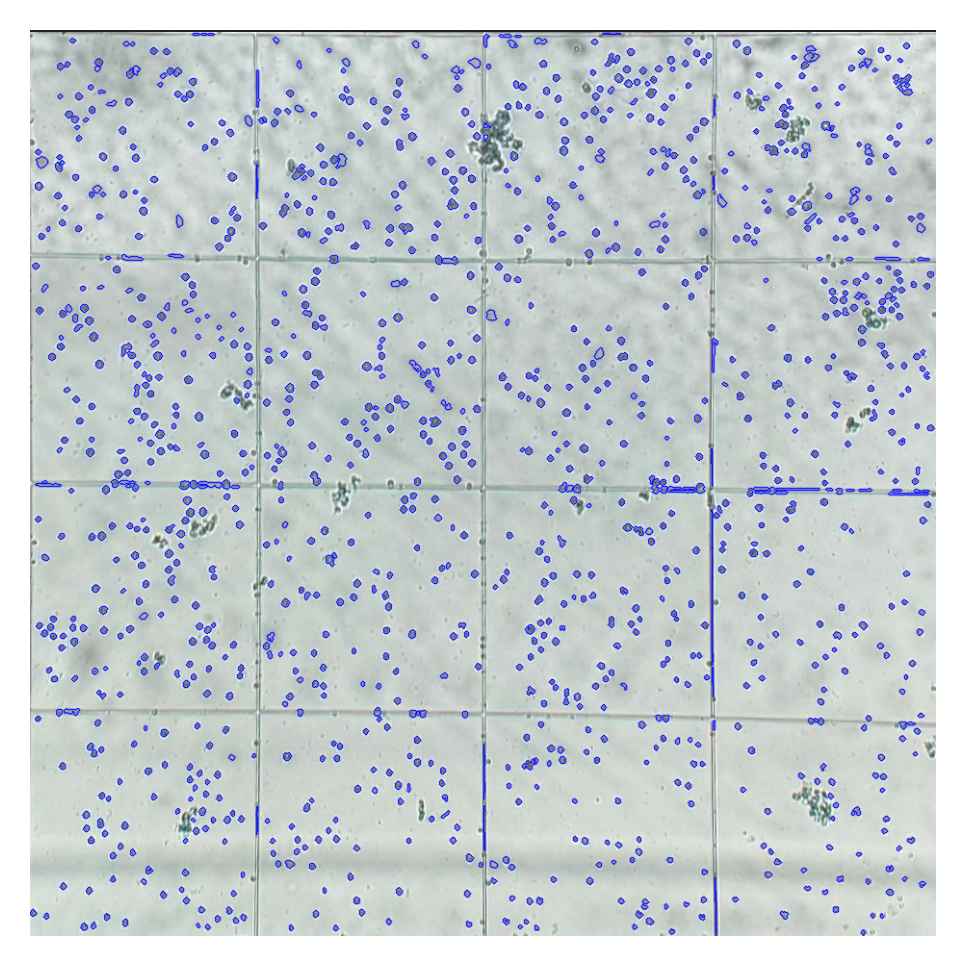

In [167]:
algae, totals = [], []
img = cells['1bl'].copy()
# img = cv2.imread("images/6blFilter.jpg")
img = img[:img.shape[0]-10, :img.shape[1]-15]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1]
contours, _ = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
contours = [ c for c in contours if 100 > cv2.contourArea(c) > 10]
cell_area = sum([cv2.contourArea(c) for c in contours])
total_area = img.shape[0] * img.shape[1]
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
print(f"cell area: {cell_area}, total_area {total_area}")
algae.append(cell_area); totals.append(total_area);
display(img, 300)
